In [216]:
import pandas as pd

In [217]:
df_lyon = pd.read_csv('Lyon.csv', sep=',', encoding='utf-8')
df_paris = pd.read_csv('Paris.csv', sep=',', encoding='utf-8')

In [218]:
df_lyon['city'] = 'Lyon'
df_paris['city'] = 'Paris'

In [219]:
# Liste des colonnes peu pertinentes pour la prédiction du prix
cols_to_drop = [
    'id', 'listing_url', 'scrape_id', 'last_scraped', 'source', 'name',
    'description', 'picture_url', 'host_id',
    'host_url', 'host_about', 'host_thumbnail_url',
    'host_picture_url', 'host_verifications', 'calendar_updated',
    'calendar_last_scraped', 'license','neighbourhood_group_cleansed'
]

# Suppression des colonnes non pertinentes
df_paris.drop(columns=cols_to_drop, inplace=True)
df_lyon.drop(columns=cols_to_drop, inplace=True)

In [220]:
df = pd.concat([df_paris, df_lyon], ignore_index=True)

In [221]:
df

,neighborhood_overview,host_name,host_since,host_location,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_neighbourhood,host_listings_count,...,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,city,availability_eoy,number_of_reviews_ly,estimated_occupancy_l365d,estimated_revenue_l365d
0,Good restaurants<br />very close the Montparna...,Anne,2008-10-14,"Paris, France",within an hour,100%,67%,f,Alésia,1.0,...,1,1,0,0,0.05,Paris,NaN,NaN,NaN,NaN
1,"You are within walking distance to the Louvre,...",Borzou,2009-02-14,"Paris, France",within an hour,100%,91%,NaN,Saint-Paul - Ile Saint-Louis,2.0,...,1,1,0,0,2.26,Paris,NaN,NaN,NaN,NaN
2,NaN,Franck,2008-08-30,"Paris, France",within an hour,100%,68%,t,Le Marais,2.0,...,2,2,0,0,2.20,Paris,NaN,NaN,NaN,NaN
3,NaN,Anaïs,2009-06-18,"Paris, France",NaN,NaN,0%,f,Gare du Nord - Gare de I'Est,1.0,...,1,1,0,0,0.03,Paris,NaN,NaN,NaN,NaN
4,NaN,Bernadette,2009-07-29,"New York, NY",NaN,NaN,NaN,f,Châtelet - Les Halles - Beaubourg,2.0,...,1,1,0,0,NaN,Paris,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100440,NaN,Pablo,2024-09-12,NaN,within an hour,87%,100%,f,NaN,59.0,...,29,29,0,0,NaN,Lyon,273.0,0.0,0.0,0.0
100441,NaN,Pablo,2024-09-12,NaN,within an hour,87%,100%,f,NaN,59.0,...,29,29,0,0,NaN,Lyon,291.0,0.0,0.0,0.0
100442,NaN,Pablo,2024-09-12,NaN,within an hour,87%,100%,f,NaN,59.0,...,29,29,0,0,NaN,Lyon,264.0,0.0,0.0,0.0
100443,NaN,Pablo,2024-09-12,NaN,within an hour,87%,100%,f,NaN,59.0,...,29,29,0,0,NaN,Lyon,279.0,0.0,0.0,0.0


In [222]:
null_percentage = (df.isnull().sum() / len(df)) * 100
print(null_percentage)
print(df.shape)

neighborhood_overview        49.457912
host_name                     0.027876
host_since                    0.030863
host_location                19.671462
host_response_time           43.196774
                               ...    
city                          0.000000
availability_eoy             90.627707
number_of_reviews_ly         90.627707
estimated_occupancy_l365d    90.627707
estimated_revenue_l365d      94.880781
Length: 62, dtype: float64
(100445, 62)


In [223]:
# Imputation des valeurs manquantes avec la médiane
columns_to_impute = [
    'host_listings_count',
    'host_total_listings_count',
    'host_has_profile_pic',
    'host_identity_verified',
    'property_type',
    'accommodates',
    'bathrooms'
]

for column in columns_to_impute:
    if df[column].dtype in ['float64', 'int64']:
        df[column].fillna(df[column].median(), inplace=True)
    else:
        df[column].fillna(df[column].mode()[0], inplace=True)

C:\Users\sarah\AppData\Local\Temp\ipykernel_15800\2407239252.py:14: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[column].fillna(df[column].median(), inplace=True)
C:\Users\sarah\AppData\Local\Temp\ipykernel_15800\2407239252.py:14: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

F

In [224]:
null_percentage = (df.isnull().sum() / len(df)) * 100
print(null_percentage)
print(df.shape)

neighborhood_overview        49.457912
host_name                     0.027876
host_since                    0.030863
host_location                19.671462
host_response_time           43.196774
                               ...    
city                          0.000000
availability_eoy             90.627707
number_of_reviews_ly         90.627707
estimated_occupancy_l365d    90.627707
estimated_revenue_l365d      94.880781
Length: 62, dtype: float64
(100445, 62)


In [225]:
df.dropna(inplace=True)

In [226]:
df.shape

(875, 62)

In [227]:
for column in df.columns:
    if df[column].dtype in ['float64', 'int64']:
        df[column].fillna(df[column].min(), inplace=True)
    else:
        df[column].fillna('', inplace=True)  # Pour les colonnes non numériques, on remplace par une chaîne vide

C:\Users\sarah\AppData\Local\Temp\ipykernel_15800\1202095039.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[column].fillna('', inplace=True)  # Pour les colonnes non numériques, on remplace par une chaîne vide
C:\Users\sarah\AppData\Local\Temp\ipykernel_15800\1202095039.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which 

In [228]:
null_percentage = (df.isnull().sum() / len(df)) * 100
print(null_percentage)
print(df.shape)

neighborhood_overview        0.0
host_name                    0.0
host_since                   0.0
host_location                0.0
host_response_time           0.0
                            ... 
city                         0.0
availability_eoy             0.0
number_of_reviews_ly         0.0
estimated_occupancy_l365d    0.0
estimated_revenue_l365d      0.0
Length: 62, dtype: float64
(875, 62)


In [229]:
df["price"]

91031     $121.00
91035     $174.00
91038      $40.00
91039      $85.00
91040     $155.00
           ...   
100037     $70.00
100092     $68.00
100127     $60.00
100142     $98.00
100312     $57.00
Name: price, Length: 875, dtype: object

In [230]:
df

,neighborhood_overview,host_name,host_since,host_location,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_neighbourhood,host_listings_count,...,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,city,availability_eoy,number_of_reviews_ly,estimated_occupancy_l365d,estimated_revenue_l365d
91031,"the general atmosphere, the magnificent archit...",Isabelle,2010-10-24,"Lyon, France",within a few hours,100%,33%,f,5th Arrondissement,1.0,...,1,1,0,0,0.32,Lyon,298.0,1.0,60.0,7260.0
91035,A prime location in the center of the city of ...,Giuseppina,2011-07-18,"Rhône-Alpes, France",within an hour,100%,98%,f,1st Arrondissement,5.0,...,2,2,0,0,2.96,Lyon,0.0,33.0,162.0,28188.0
91038,you will be in the Typical historical croix Ro...,Emmanuel,2011-10-21,"Lyon, France",within an hour,100%,57%,t,1st Arrondissement,1.0,...,1,1,0,0,0.11,Lyon,205.0,5.0,168.0,6720.0
91039,residential area. We have a park for children ...,NATHALIE Et ALAIN,2012-02-01,"Lyon, France",within a few hours,100%,50%,f,3rd Arrondissement,3.0,...,1,1,0,0,0.19,Lyon,0.0,3.0,18.0,1530.0
91040,Saxe-Gambetta is an authentic area on the left...,Amael Et Ida,2012-02-12,"Lyon, France",within an hour,100%,100%,t,3rd Arrondissement,1.0,...,1,1,0,0,2.32,Lyon,170.0,37.0,198.0,30690.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100037,Ideally located in the second arrondissement o...,2beapart,2013-04-15,"Lyon, France",within an hour,100%,91%,t,2nd Arrondissement,58.0,...,54,54,0,0,0.75,Lyon,93.0,0.0,60.0,4200.0
100092,Garibaldi Part Dieu,Arielle Caroline,2018-03-06,"Lyon, France",within an hour,99%,99%,f,8th Arrondissement,109.0,...,55,55,0,0,5.14,Lyon,277.0,0.0,36.0,2448.0
100127,🏙 An exceptional location in the middle of Lyo...,Nicolas,2018-08-06,"Meyzieu, France",within an hour,100%,100%,f,7th Arrondissement,6.0,...,6,6,0,0,3.00,Lyon,96.0,0.0,18.0,1080.0
100142,Ideally located in the second arrondissement o...,2beapart,2013-04-15,"Lyon, France",within an hour,100%,91%,t,2nd Arrondissement,58.0,...,54,54,0,0,0.71,Lyon,295.0,0.0,6.0,588.0


In [231]:
df.dtypes

neighborhood_overview         object
host_name                     object
host_since                    object
host_location                 object
host_response_time            object
                              ...   
city                          object
availability_eoy             float64
number_of_reviews_ly         float64
estimated_occupancy_l365d    float64
estimated_revenue_l365d      float64
Length: 62, dtype: object

In [232]:
import numpy as np

df.replace(r'^\s*$', np.nan, regex=True, inplace=True)

In [233]:
null_percentage = (df.isnull().sum() / len(df)) * 100
print(null_percentage)
print(df.shape)

neighborhood_overview        0.0
host_name                    0.0
host_since                   0.0
host_location                0.0
host_response_time           0.0
                            ... 
city                         0.0
availability_eoy             0.0
number_of_reviews_ly         0.0
estimated_occupancy_l365d    0.0
estimated_revenue_l365d      0.0
Length: 62, dtype: float64
(875, 62)


In [234]:

# Extraire le symbole de la colonne 'price'
df['currency_symbol'] = df['price'].str.extract(r'(\D)')

#On retire le symbole de la colonne 'price'
df['price'] = df['price'].str.replace(r'(\D)', '', regex=True)

#O convertit la colonne 'price' en float
df['price'] = df['price'].astype(float)

In [235]:
df.dropna(subset=['price'], inplace=True)

df['has_availability'].fillna('f', inplace=True)

C:\Users\sarah\AppData\Local\Temp\ipykernel_15800\3516684123.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['has_availability'].fillna('f', inplace=True)


In [236]:
null_percentage = (df.isnull().sum() / len(df)) * 100
print(null_percentage)
print(df.shape)

neighborhood_overview        0.0
host_name                    0.0
host_since                   0.0
host_location                0.0
host_response_time           0.0
                            ... 
availability_eoy             0.0
number_of_reviews_ly         0.0
estimated_occupancy_l365d    0.0
estimated_revenue_l365d      0.0
currency_symbol              0.0
Length: 63, dtype: float64
(875, 63)


In [237]:
print(df['currency_symbol'].unique())
df.drop(columns=['currency_symbol'], inplace=True)

['$']


In [238]:
null_percentage = (df.isnull().sum() / len(df)) * 100
print(null_percentage)
print(df.shape)

neighborhood_overview        0.0
host_name                    0.0
host_since                   0.0
host_location                0.0
host_response_time           0.0
                            ... 
city                         0.0
availability_eoy             0.0
number_of_reviews_ly         0.0
estimated_occupancy_l365d    0.0
estimated_revenue_l365d      0.0
Length: 62, dtype: float64
(875, 62)


In [239]:
df

,neighborhood_overview,host_name,host_since,host_location,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_neighbourhood,host_listings_count,...,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,city,availability_eoy,number_of_reviews_ly,estimated_occupancy_l365d,estimated_revenue_l365d
91031,"the general atmosphere, the magnificent archit...",Isabelle,2010-10-24,"Lyon, France",within a few hours,100%,33%,f,5th Arrondissement,1.0,...,1,1,0,0,0.32,Lyon,298.0,1.0,60.0,7260.0
91035,A prime location in the center of the city of ...,Giuseppina,2011-07-18,"Rhône-Alpes, France",within an hour,100%,98%,f,1st Arrondissement,5.0,...,2,2,0,0,2.96,Lyon,0.0,33.0,162.0,28188.0
91038,you will be in the Typical historical croix Ro...,Emmanuel,2011-10-21,"Lyon, France",within an hour,100%,57%,t,1st Arrondissement,1.0,...,1,1,0,0,0.11,Lyon,205.0,5.0,168.0,6720.0
91039,residential area. We have a park for children ...,NATHALIE Et ALAIN,2012-02-01,"Lyon, France",within a few hours,100%,50%,f,3rd Arrondissement,3.0,...,1,1,0,0,0.19,Lyon,0.0,3.0,18.0,1530.0
91040,Saxe-Gambetta is an authentic area on the left...,Amael Et Ida,2012-02-12,"Lyon, France",within an hour,100%,100%,t,3rd Arrondissement,1.0,...,1,1,0,0,2.32,Lyon,170.0,37.0,198.0,30690.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100037,Ideally located in the second arrondissement o...,2beapart,2013-04-15,"Lyon, France",within an hour,100%,91%,t,2nd Arrondissement,58.0,...,54,54,0,0,0.75,Lyon,93.0,0.0,60.0,4200.0
100092,Garibaldi Part Dieu,Arielle Caroline,2018-03-06,"Lyon, France",within an hour,99%,99%,f,8th Arrondissement,109.0,...,55,55,0,0,5.14,Lyon,277.0,0.0,36.0,2448.0
100127,🏙 An exceptional location in the middle of Lyo...,Nicolas,2018-08-06,"Meyzieu, France",within an hour,100%,100%,f,7th Arrondissement,6.0,...,6,6,0,0,3.00,Lyon,96.0,0.0,18.0,1080.0
100142,Ideally located in the second arrondissement o...,2beapart,2013-04-15,"Lyon, France",within an hour,100%,91%,t,2nd Arrondissement,58.0,...,54,54,0,0,0.71,Lyon,295.0,0.0,6.0,588.0


In [240]:
duplicates = df[df.duplicated()]
duplicates

,neighborhood_overview,host_name,host_since,host_location,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_neighbourhood,host_listings_count,...,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,city,availability_eoy,number_of_reviews_ly,estimated_occupancy_l365d,estimated_revenue_l365d


In [241]:
df.drop_duplicates(inplace=True)

In [242]:
df.shape

(875, 62)

In [243]:
df.dtypes

neighborhood_overview         object
host_name                     object
host_since                    object
host_location                 object
host_response_time            object
                              ...   
city                          object
availability_eoy             float64
number_of_reviews_ly         float64
estimated_occupancy_l365d    float64
estimated_revenue_l365d      float64
Length: 62, dtype: object

In [244]:
correlations = df.corr(numeric_only=True)
print(correlations)

                                              host_listings_count  \
host_listings_count                                      1.000000   
host_total_listings_count                                0.987364   
latitude                                                 0.029460   
longitude                                                0.073027   
accommodates                                            -0.003226   
bathrooms                                               -0.021941   
bedrooms                                                -0.081941   
beds                                                    -0.052915   
price                                                   -0.023503   
minimum_nights                                           0.004551   
maximum_nights                                           0.273384   
minimum_minimum_nights                                   0.010842   
maximum_minimum_nights                                   0.025015   
minimum_maximum_nights            

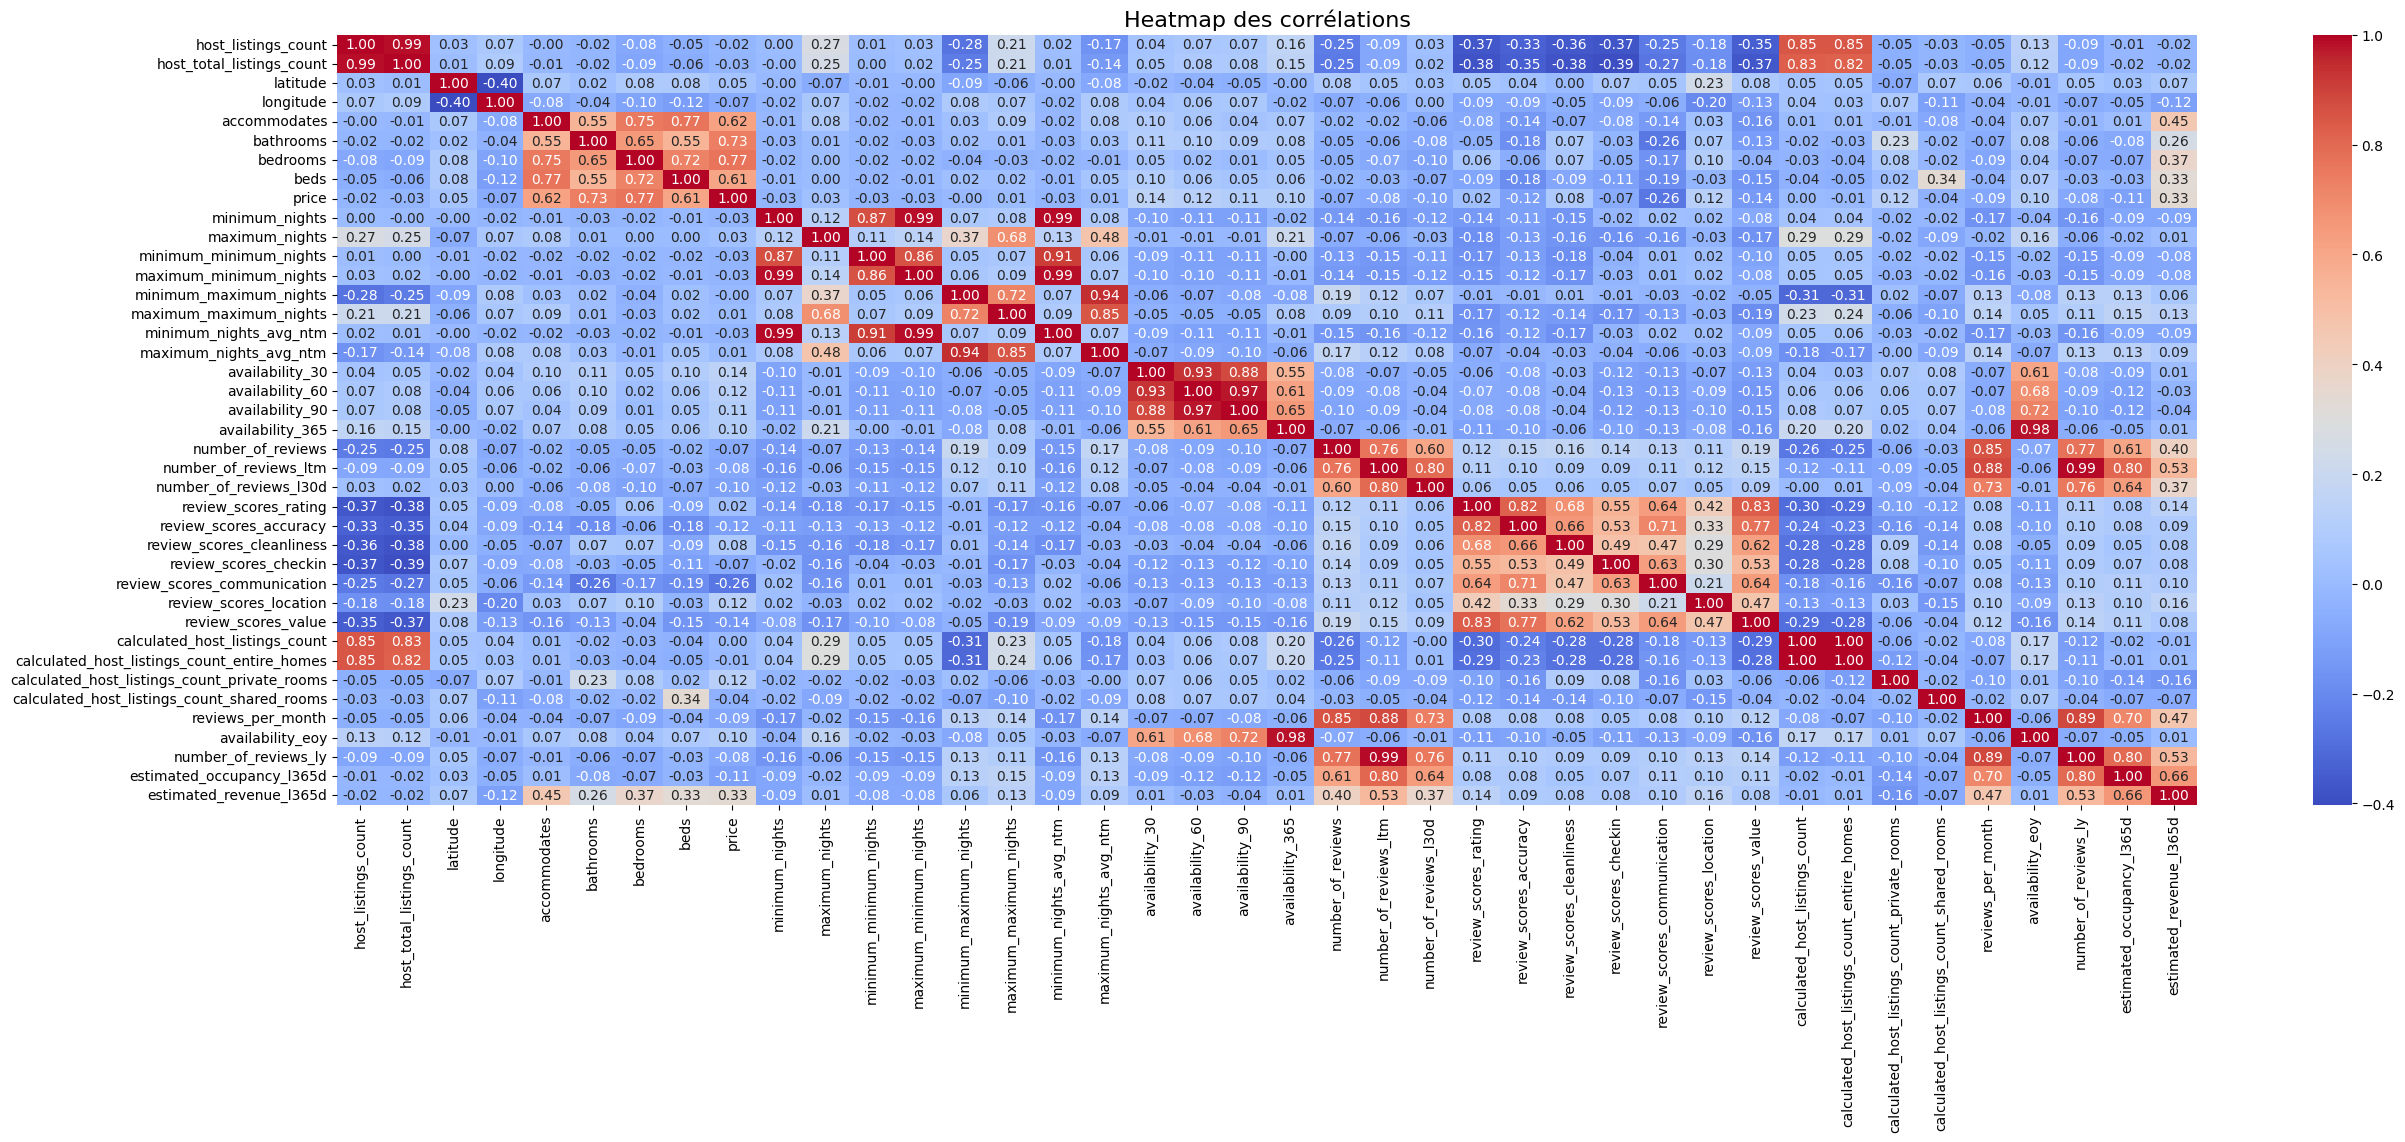

In [245]:
import seaborn as sns

import matplotlib.pyplot as plt

# Création du heatmap
plt.figure(figsize=(30, 10))
sns.heatmap(correlations, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)

# Ajouter un titre
plt.title("Heatmap des corrélations", fontsize=16)

# Afficher le graphique
plt.show()

In [246]:
correlations['price'].sort_values(ascending=False)

price                                           1.000000
bedrooms                                        0.766180
bathrooms                                       0.733253
accommodates                                    0.616743
beds                                            0.610775
estimated_revenue_l365d                         0.334586
availability_30                                 0.144501
review_scores_location                          0.121170
availability_60                                 0.119843
calculated_host_listings_count_private_rooms    0.118873
availability_90                                 0.106816
availability_365                                0.104970
availability_eoy                                0.102922
review_scores_cleanliness                       0.084561
latitude                                        0.045599
maximum_nights                                  0.029543
review_scores_rating                            0.019781
maximum_maximum_nights         

In [247]:
df["room_type"]

91031     Entire home/apt
91035     Entire home/apt
91038     Entire home/apt
91039     Entire home/apt
91040     Entire home/apt
               ...       
100037    Entire home/apt
100092    Entire home/apt
100127    Entire home/apt
100142    Entire home/apt
100312    Entire home/apt
Name: room_type, Length: 875, dtype: object

In [248]:
# Mapping des types de chambres à des entiers
room_type_mapping = {
    'Entire home/apt': 0,
    'Private room': 1,
    'Shared room': 2,
    'Hotel room': 3
}

# Application du mapping à la colonne room_type
df['room_type_encoded'] = df['room_type'].map(room_type_mapping)

# Vérification des résultats
print(df[['room_type', 'room_type_encoded']].head())

             room_type  room_type_encoded
91031  Entire home/apt                  0
91035  Entire home/apt                  0
91038  Entire home/apt                  0
91039  Entire home/apt                  0
91040  Entire home/apt                  0


In [249]:
df.dtypes

neighborhood_overview         object
host_name                     object
host_since                    object
host_location                 object
host_response_time            object
                              ...   
availability_eoy             float64
number_of_reviews_ly         float64
estimated_occupancy_l365d    float64
estimated_revenue_l365d      float64
room_type_encoded              int64
Length: 63, dtype: object

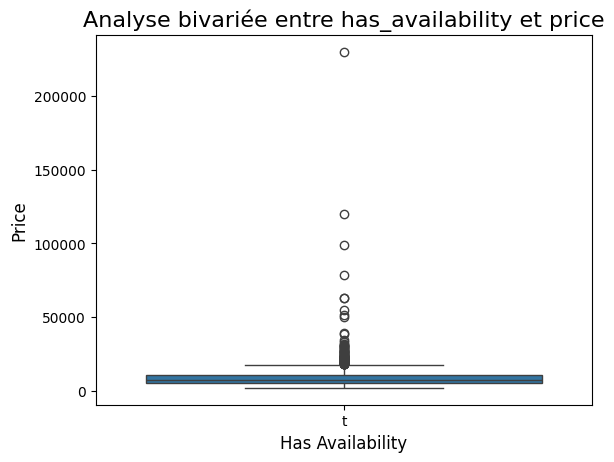

In [250]:
# Analyse bivariée entre has_availability et price
sns.boxplot(x='has_availability', y='price', data=df)

# Ajouter un titre et des labels
plt.title("Analyse bivariée entre has_availability et price", fontsize=16)
plt.xlabel("Has Availability", fontsize=12)
plt.ylabel("Price", fontsize=12)

# Afficher le graphique
plt.show()

In [251]:
# # Calculer la moyenne des prix par type de chambre
# room_type_price_mean = df.groupby('room_type')['price'].mean().sort_values(ascending=False)

# # Créer un graphique en barres
# plt.figure(figsize=(10, 6))
# room_type_price_mean.plot(kind='bar', color='skyblue')

# # Ajouter un titre et des labels
# plt.title("Moyenne des prix par type de chambre", fontsize=16)
# plt.xlabel("Type de chambre", fontsize=12)
# plt.ylabel("Prix moyen", fontsize=12)

# # Afficher le graphique
# plt.xticks(rotation=45, ha='right')
# plt.show()

In [252]:
df.columns

Index(['neighborhood_overview', 'host_name', 'host_since', 'host_location',
       'host_response_time', 'host_response_rate', 'host_acceptance_rate',
       'host_is_superhost', 'host_neighbourhood', 'host_listings_count',
       'host_total_listings_count', 'host_has_profile_pic',
       'host_identity_verified', 'neighbourhood', 'neighbourhood_cleansed',
       'latitude', 'longitude', 'property_type', 'room_type', 'accommodates',
       'bathrooms', 'bathrooms_text', 'bedrooms', 'beds', 'amenities', 'price',
       'minimum_nights', 'maximum_nights', 'minimum_minimum_nights',
       'maximum_minimum_nights', 'minimum_maximum_nights',
       'maximum_maximum_nights', 'minimum_nights_avg_ntm',
       'maximum_nights_avg_ntm', 'has_availability', 'availability_30',
       'availability_60', 'availability_90', 'availability_365',
       'number_of_reviews', 'number_of_reviews_ltm', 'number_of_reviews_l30d',
       'first_review', 'last_review', 'review_scores_rating',
       'review_sc

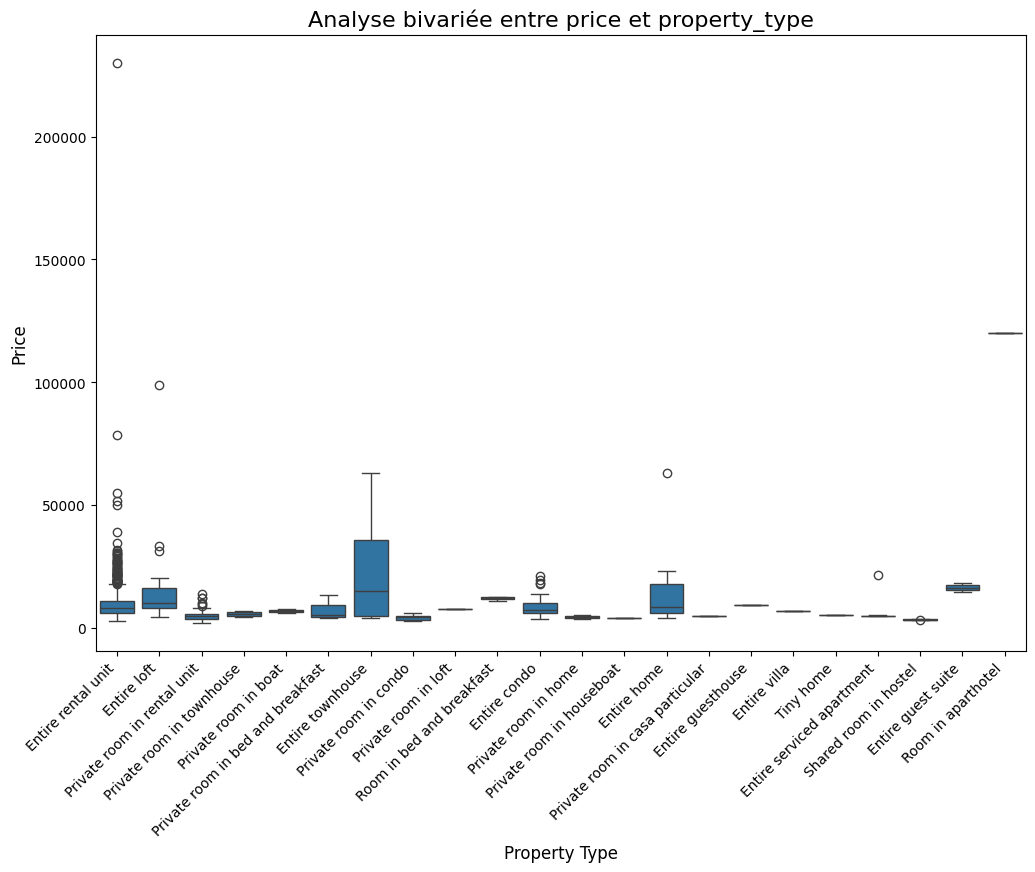

In [253]:
# Analyse bivariée entre price et property_type
plt.figure(figsize=(12, 8))
sns.boxplot(x='property_type', y='price', data=df)

# Rotation des labels pour une meilleure lisibilité
plt.xticks(rotation=45, ha='right')

# Ajouter un titre et des labels
plt.title("Analyse bivariée entre price et property_type", fontsize=16)
plt.xlabel("Property Type", fontsize=12)
plt.ylabel("Price", fontsize=12)

# Afficher le graphique
plt.show()

In [254]:
df["property_type"].unique()

array(['Entire rental unit', 'Entire loft', 'Private room in rental unit',
       'Private room in townhouse', 'Private room in boat',
       'Private room in bed and breakfast', 'Entire townhouse',
       'Private room in condo', 'Private room in loft',
       'Room in bed and breakfast', 'Entire condo',
       'Private room in home', 'Private room in houseboat', 'Entire home',
       'Private room in casa particular', 'Entire guesthouse',
       'Entire villa', 'Tiny home', 'Entire serviced apartment',
       'Shared room in hostel', 'Entire guest suite',
       'Room in aparthotel'], dtype=object)

In [255]:

from sklearn.preprocessing import LabelEncoder

# Initialisation du LabelEncoder
le = LabelEncoder()

# Application du LabelEncoder sur la colonne property_type
df['property_type_encoded'] = le.fit_transform(df['property_type'])
df['room_type_encoder'] = le.fit_transform(df['room_type'])
df["neighbourhood_cleansed_encoded"] = le.fit_transform(df["neighbourhood_cleansed"])
df["host_is_superhost_encoded"] = le.fit_transform(df["host_is_superhost"])

# Vérification des résultats
print(df[['property_type', 'property_type_encoded']].sample(10))

                           property_type  property_type_encoded
95033                 Entire rental unit                      5
91254                 Entire rental unit                      5
95027          Private room in townhouse                     17
95264                       Entire condo                      0
92183                 Entire rental unit                      5
93965  Private room in bed and breakfast                      9
91770                 Entire rental unit                      5
94613                 Entire rental unit                      5
94482                 Entire rental unit                      5
94803        Private room in rental unit                     16


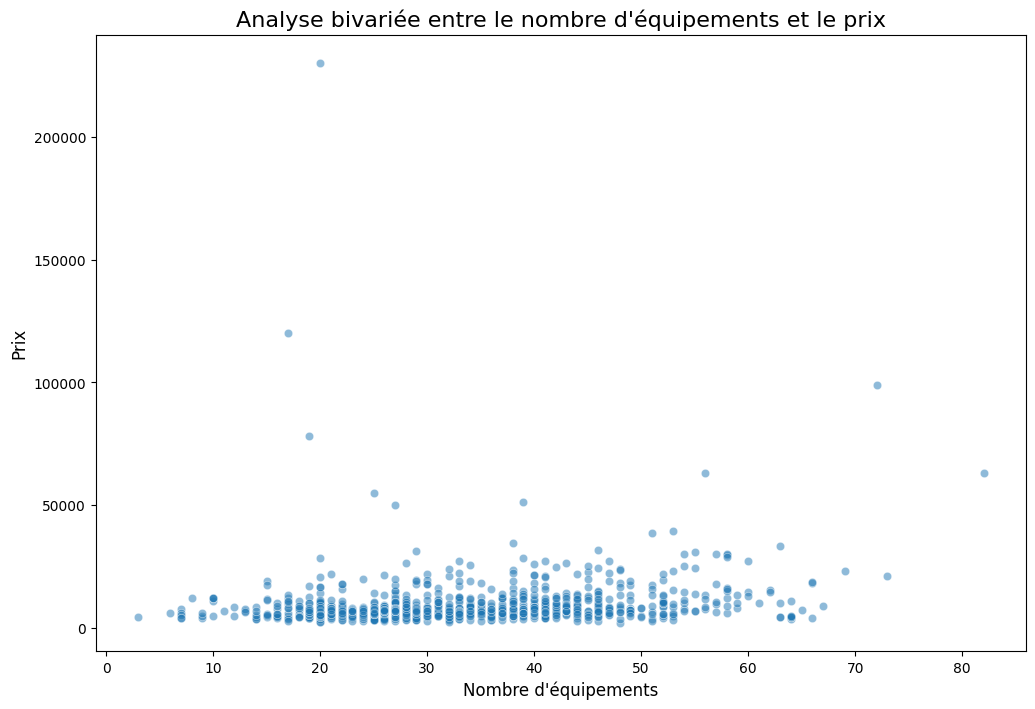

In [256]:
# Compter le nombre d'équipements pour chaque logement
df['amenities_count'] = df['amenities'].apply(lambda x: len(eval(x)))

# Analyse bivariée entre amenities_count et price
plt.figure(figsize=(12, 8))
sns.scatterplot(x='amenities_count', y='price', data=df, alpha=0.5)

# Ajouter un titre et des labels
plt.title("Analyse bivariée entre le nombre d'équipements et le prix", fontsize=16)
plt.xlabel("Nombre d'équipements", fontsize=12)
plt.ylabel("Prix", fontsize=12)

# Afficher le graphique
plt.show()

C:\Users\sarah\AppData\Local\Temp\ipykernel_15800\3418384127.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='room_type_encoded', y='price', data=df, inner="quartile", palette="muted")


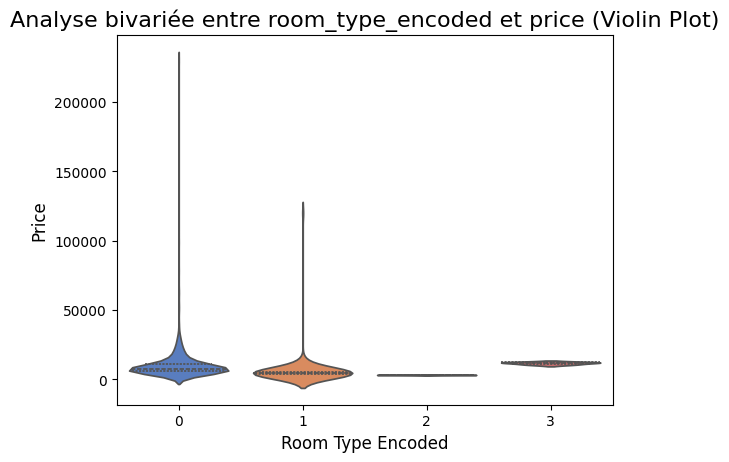

In [257]:
# Analyse bivariée entre room_type_encoded et price avec un graphique en violon
sns.violinplot(x='room_type_encoded', y='price', data=df, inner="quartile", palette="muted")

# Ajouter un titre et des labels
plt.title("Analyse bivariée entre room_type_encoded et price (Violin Plot)", fontsize=16)
plt.xlabel("Room Type Encoded", fontsize=12)
plt.ylabel("Price", fontsize=12)

# Afficher le graphique
plt.show()

In [258]:
df.dtypes


neighborhood_overview             object
host_name                         object
host_since                        object
host_location                     object
host_response_time                object
                                   ...  
property_type_encoded              int64
room_type_encoder                  int64
neighbourhood_cleansed_encoded     int64
host_is_superhost_encoded          int64
amenities_count                    int64
Length: 68, dtype: object

In [259]:
from sklearn.preprocessing import LabelEncoder

# Encoder toutes les colonnes
for column in df.columns:
    if df[column].dtype == 'object':  # Si la colonne est de type object (catégorique)
        le = LabelEncoder()
        df[column] = le.fit_transform(df[column].astype(str))
    else:  # Si la colonne est numérique
        df[column] = df[column].fillna(0)  # Remplir les valeurs manquantes avec 0 (ou une autre valeur par défaut)

In [260]:
df["amenities"].unique()

array([728, 208, 677, 296, 768, 630, 491, 760, 714, 342, 453, 495, 381,
       352, 341, 667, 135, 125, 201, 267, 105, 586, 301, 482,  33, 735,
       151, 178, 361,  58,  46,  98, 490,  76, 282, 680, 686,  95, 399,
       111, 535, 384, 343, 740, 798, 356, 358, 722, 144, 396, 800,  28,
       551, 488, 363, 170, 154, 828, 202, 462, 139, 366, 113, 443, 277,
       355,   9, 505, 585, 455,  88, 477, 767, 511, 422, 701, 625, 708,
       213, 834, 164, 527, 707, 589, 165, 649, 566, 483,  54, 435, 132,
       825, 652, 616, 316, 368, 450, 733, 441, 659,  56, 698,  12, 661,
       109, 653, 412, 181, 106, 577, 286, 703, 765, 569,  47, 461,  74,
       806, 375,  52, 702,  34, 523, 816,  62, 140, 475, 258, 126, 481,
       584, 533, 640, 118, 530, 255, 452, 102, 536, 415, 227, 207, 365,
       605,  90, 486,   0,   8, 531,  37, 668, 541, 814, 780, 206,  18,
       314, 357, 539, 782,  75, 595, 526, 226, 438, 246, 419, 261,  49,
        81, 287, 524, 283, 783,  89, 518, 587, 691, 756, 512, 37

In [261]:
from sklearn.preprocessing import LabelEncoder

# Encoder toutes les colonnes
for column in df.columns:
    if df[column].dtype == 'object':  # Si la colonne est de type object (catégorique)
        le = LabelEncoder()
        df[column] = le.fit_transform(df[column].astype(str))
    else:  # Si la colonne est numérique
        df[column] = df[column].fillna(0)  # Remplir les valeurs manquantes avec 0 (ou une autre valeur par défaut)

In [262]:
df['city']

91031     0
91035     0
91038     0
91039     0
91040     0
         ..
100037    0
100092    0
100127    0
100142    0
100312    0
Name: city, Length: 875, dtype: int64

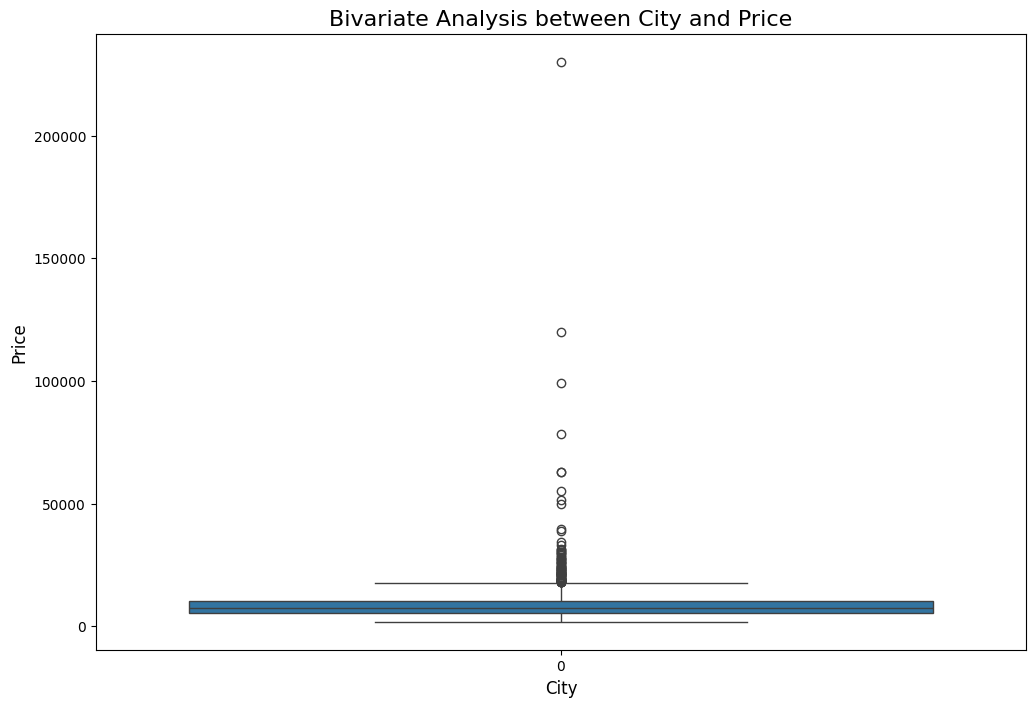

In [263]:
plt.figure(figsize=(12, 8))
sns.boxplot(x='city', y='price', data=df)

# Adding title and labels
plt.title("Bivariate Analysis between City and Price", fontsize=16)
plt.xlabel("City", fontsize=12)
plt.ylabel("Price", fontsize=12)

# Display the plot
plt.show()

Accomodate , bathrooms, bed, property_type

In [264]:
# from sklearn.model_selection import train_test_split
# from sklearn.linear_model import LinearRegression
# from sklearn.metrics import mean_squared_error, r2_score

# # Sélection des colonnes pertinentes pour la prédiction
# features = ['neighborhood_overview','accommodates', 'bathrooms','bedrooms','city', 'beds','minimum_maximum_nights','last_review', 'review_scores_location']
# target = ['price']

# # Préparation des données
# X = df[features]
# y = df[target]

# # Division des données en ensembles d'entraînement et de test
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.01, random_state=42)

# # Création et entraînement du modèle de régression linéaire
# model = LinearRegression(fit_intercept=True)
# model.fit(X_train, y_train)

# # Prédictions sur l'ensemble de test
# y_pred = model.predict(X_test)

# # Évaluation du modèle
# mse = mean_squared_error(y_test, y_pred)
# r2 = r2_score(y_test, y_pred)

# print(f"Mean Squared Error: {mse}")
# print(f"R² Score: {r2}")

C:\Users\sarah\AppData\Local\Temp\ipykernel_15800\2638419392.py:21: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_processed[col].fillna(df_processed[col].median(), inplace=True)
C:\Users\sarah\AppData\Local\Temp\ipykernel_15800\2638419392.py:21: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves

Caractéristiques utilisées: ['accommodates', 'bathrooms', 'bedrooms', 'beds', 'city', 'review_scores_location', 'neighborhood_desc_length', 'positive_neighborhood_keywords', 'review_year', 'review_month', 'days_since_review']
Mean Squared Error: 30912139.77
Root Mean Squared Error: 5559.87
R² Score: 0.7780


<Figure size 1000x600 with 0 Axes>

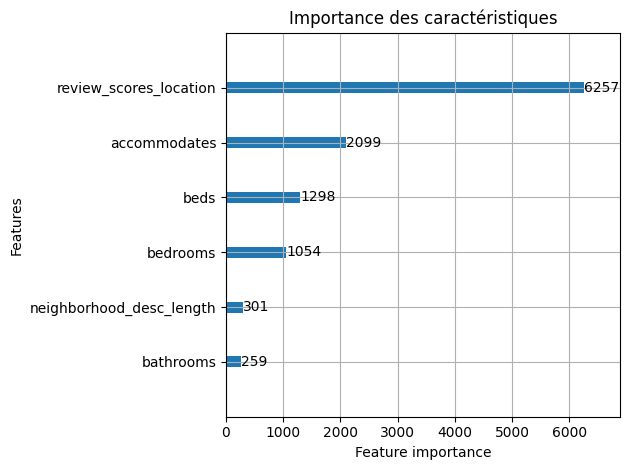

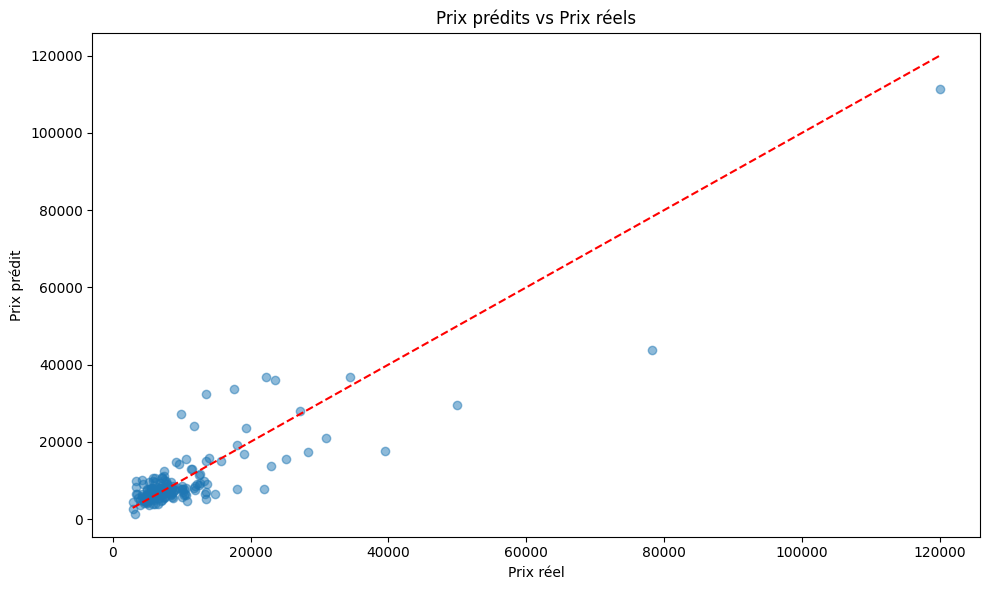

R² Score: 0.7780


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
import lightgbm as lgb # type: ignore
import matplotlib.pyplot as plt

# Supposons que df est votre DataFrame déjà chargé

# 1. Prétraitement des données textuelles
def preprocess_data(df):
    # Copie pour éviter les modifications sur le DataFrame original
    df_processed = df.copy()
    
    # Gestion des valeurs manquantes
    for col in df_processed.columns:
        if df_processed[col].dtype == 'object':
            df_processed[col].fillna('Unknown', inplace=True)
        else:
            df_processed[col].fillna(df_processed[col].median(), inplace=True)
    
    # Conversion des dates en caractéristiques numériques
    if 'last_review' in df_processed.columns:
        # Convertir en datetime si ce n'est pas déjà fait
        df_processed['last_review'] = pd.to_datetime(df_processed['last_review'], errors='coerce')
        # Créer des caractéristiques à partir de la date
        df_processed['review_year'] = df_processed['last_review'].dt.year
        df_processed['review_month'] = df_processed['last_review'].dt.month
        df_processed['days_since_review'] = (pd.Timestamp.now() - df_processed['last_review']).dt.days
        # Supprimer la colonne originale
        df_processed.drop('last_review', axis=1, inplace=True)
    
    # Encodage des variables catégorielles
    categorical_cols = ['city']
    for col in categorical_cols:
        if col in df_processed.columns:
            le = LabelEncoder()
            df_processed[col] = le.fit_transform(df_processed[col])
    
    # Extraction d'informations de texte pour neighborhood_overview
    if 'neighborhood_overview' in df_processed.columns:
        # Longueur de la description comme proxy de qualité
        # Convertir en chaînes de caractères pour éviter les erreurs
        df_processed['neighborhood_overview'] = df_processed['neighborhood_overview'].astype(str)
        df_processed['neighborhood_desc_length'] = df_processed['neighborhood_overview'].str.len()
        # Présence de mots-clés positifs
        positive_keywords = ['great', 'excellent', 'beautiful', 'convenient', 'safe', 'quiet', 'central']
        df_processed['positive_neighborhood_keywords'] = df_processed['neighborhood_overview'].str.lower().apply(
            lambda x: sum(1 for keyword in positive_keywords if keyword in x)
        )
        # Suppression de la colonne texte originale
        df_processed.drop('neighborhood_overview', axis=1, inplace=True)
    
    # Correction de minimum_maximum_nights (supposant qu'il s'agit de deux colonnes)
    if 'minimum_maximum_nights' in df_processed.columns:
        # S'il s'agit d'un problème de nom, renommez-la
        df_processed.rename(columns={'minimum_maximum_nights': 'minimum_nights'}, inplace=True)
        # Si c'est une combinaison de deux variables, les séparer
        # (Cette partie dépend de la structure réelle de vos données)
    
    return df_processed

# Application du prétraitement
df_processed = preprocess_data(df)

# 2. Sélection des caractéristiques (version mise à jour)
features = [
    'accommodates', 'bathrooms', 'bedrooms', 'beds', 
    'city', 'review_scores_location',
    # Nouvelles caractéristiques issues du prétraitement
    'neighborhood_desc_length', 'positive_neighborhood_keywords',
    'review_year', 'review_month', 'days_since_review'
]

# Vérification que toutes les colonnes existent
available_features = [col for col in features if col in df_processed.columns]
print(f"Caractéristiques utilisées: {available_features}")

# 3. Préparation des données
X = df_processed[available_features]
y = df_processed['price']  # Price en tant que Series et non DataFrame

# 4. Division des données (20% pour le test est plus standard)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 5. Entraînement du modèle LightGBM
# Définir les paramètres
params = {
    'objective': 'regression',
    'metric': 'rmse',
    'boosting_type': 'gbdt',
    # 'num_leaves': 31,affiche le 
    'learning_rate': 0.05,
    'feature_fraction': 0.9,
    'verbose': -1  # Set verbosity level (-1 for no output, 0 for warnings, 1 for info)
}

# Créer les datasets LightGBM
categorical_features = ['city']
categorical_indices = [X.columns.get_loc(col) for col in categorical_features if col in X.columns]

train_data = lgb.Dataset(
    X_train, 
    label=y_train, 
    categorical_feature=categorical_indices
)

# Entraînement du modèle avec gestion manuelle de l'arrêt anticipé
valid_data = lgb.Dataset(X_test, label=y_test, categorical_feature=categorical_indices)
model = lgb.train(
    params,
    train_data,
    num_boost_round=500,
    valid_sets=[valid_data]
)

# 6. Prédictions et évaluation
y_pred = model.predict(X_test)

# Métriques d'évaluation
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse:.2f}")
print(f"Root Mean Squared Error: {rmse:.2f}")
print(f"R² Score: {r2:.4f}")

# 7. Visualisation de l'importance des caractéristiques
plt.figure(figsize=(10, 6))
lgb.plot_importance(model, max_num_features=len(available_features))
plt.title('Importance des caractéristiques')
plt.tight_layout()
plt.show()

# 8. Visualisation des prédictions
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel('Prix réel')
plt.ylabel('Prix prédit')
plt.title('Prix prédits vs Prix réels')
plt.tight_layout()
plt.show()

# afficher le R²
print(f"R² Score: {r2:.4f}")



In [266]:
# from sklearn.model_selection import GridSearchCV
# from sklearn.linear_model import Ridge
# from sklearn.metrics import make_scorer, mean_squared_error

# # Définir les paramètres à tester
# param_grid = {
#     'alpha': [0.1, 1.0, 10.0, 100.0],  # Paramètre de régularisation
#     'fit_intercept': [True, False]
# }

# # Utiliser Ridge Regression pour la recherche
# ridge = Ridge()

# # Définir le scorer basé sur l'erreur quadratique moyenne
# scorer = make_scorer(mean_squared_error, greater_is_better=False)

# # Configurer GridSearchCV
# grid_search = GridSearchCV(estimator=ridge, param_grid=param_grid, scoring=scorer, cv=5)

# # Effectuer la recherche sur les données d'entraînement
# grid_search.fit(X_train, y_train)

# # Afficher les meilleurs paramètres et le score correspondant
# print("Meilleurs paramètres :", grid_search.best_params_)
# print("Meilleur score :", -grid_search.best_score_)

In [267]:
# np.sqrt(mse)

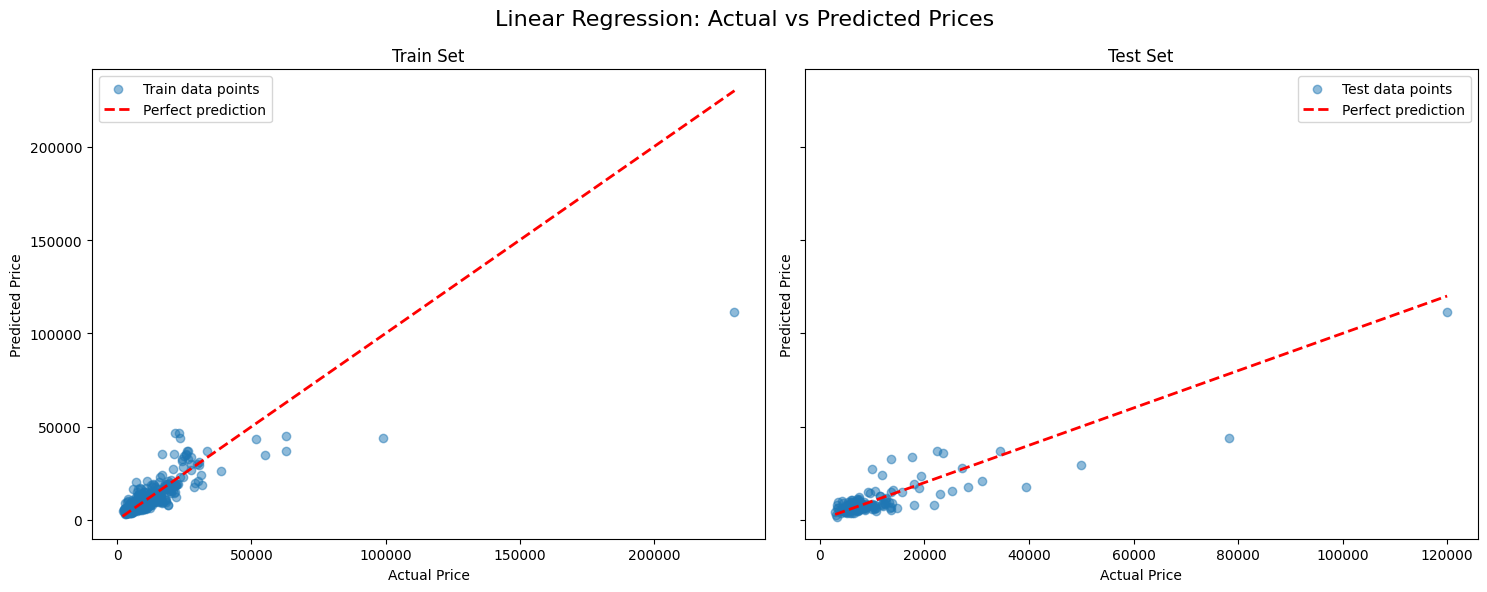

In [268]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(ncols=2, figsize=(15, 6), sharey=True)

# Train set visualization
ax[0].scatter(y_train, model.predict(X_train), alpha=0.5, label="Train data points")
ax[0].plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'r--', linewidth=2, label="Perfect prediction")
ax[0].set(xlabel="Actual Price", ylabel="Predicted Price", title="Train Set")
ax[0].legend()

# Test set visualization
ax[1].scatter(y_test, y_pred, alpha=0.5, label="Test data points")
ax[1].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', linewidth=2, label="Perfect prediction")
ax[1].set(xlabel="Actual Price", ylabel="Predicted Price", title="Test Set")
ax[1].legend()

fig.suptitle("Linear Regression: Actual vs Predicted Prices", fontsize=16)

plt.tight_layout()
plt.show()
